<a href="https://colab.research.google.com/github/jessica8403/TIL/blob/master/cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [3]:
kaggle_path = '/content/drive/MyDrive/멀티캠퍼스/data/kaggle.json'

! mkdir -p ~/.kaggle
! cp '{kaggle_path}' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
%cd '/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog'
! kaggle competitions download -c dogs-vs-cats

/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog
 97% 263M/271M [00:02<00:00, 125MB/s]
100% 271M/271M [00:02<00:00, 129MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 12.0MB/s]
 98% 530M/543M [00:04<00:00, 121MB/s]
100% 543M/543M [00:04<00:00, 132MB/s]


In [ ]:
train_path = '/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog/train.zip'
test_path = '/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog/test1.zip'

! unzip '{train_path}'
! unzip '{test_path}'

In [6]:
import os, shutil

In [7]:
# # 원본 데이터셋의 경로
# original_dataset_path = '/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog/train'

# # 소규모 데이터를 위한 폴더
# base_dir = '/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog_small/'
# # 해당 셀을 반복적으로 실행을 하면 에러가 발생(방지)
# # 기존에 해당 폴더가 이미 존재하면 삭제후 새로 생성
# if os.path.exists(base_dir):
#   shutil.rmtree(base_dir) # 기존에 폴더가 존재할 경우 삭제
# os.mkdir(base_dir)

# # 훈련셋, 검증셋, 테스트셋을 미리 분할하기 위한 폴더 경로
# train_path = os.path.join(base_dir, 'train')
# val_path = os.path.join(base_dir, 'validation')
# test_path = os.path.join(base_dir, 'test')

# # 해당 경로에 폴더를 생성
# os.mkdir(train_path)
# os.mkdir(val_path)
# os.mkdir(test_path)

# # 훈련용 고양이 사진을 위한 폴더
# train_cat_path = os.path.join(train_path, 'cats')
# os.mkdir( train_cat_path)

# # 훈련용 강아지 사진을 위한 폴더
# train_dog_path = os.path.join(train_path, 'dogs')
# os.mkdir( train_dog_path)

# # 검증용 고양이 사진을 위한 폴더
# val_cat_path = os.path.join(val_path, 'cats')
# os.mkdir( val_cat_path)

# # 검증용 강아지 사진을 위한 폴더
# val_dog_path = os.path.join(val_path, 'dogs')
# os.mkdir( val_dog_path)

# # 테스트용 고양이 사진을 위한 폴더
# test_cat_path = os.path.join(test_path, 'cats')
# os.mkdir( test_cat_path)

# # 테스트용 강아지 사진을 위한 폴더
# test_dog_path = os.path.join(test_path, 'dogs')
# os.mkdir( test_dog_path)

# # 책에서는 전체 이미지에서 10%에 해당하는 1000개의 이미지를 훈련용으로 사용
# # 검증용과, 테스트용은 각각 500개씩 사용

# # 학습용 이미지 복사
# fnames = [f'cat.{i}.jpg' for i in range(1000)]
# for fname in fnames:
#   src_path = os.path.join(original_dataset_path, fname) # 원본 파일 경로
#   dst_path = os.path.join(train_cat_path, fname)        # 복사할 파일 경로
#   shutil.copyfile( src_path, dst_path )

# fnames = [f'dog.{i}.jpg' for i in range(1000)]
# for fname in fnames:
#   src_path = os.path.join(original_dataset_path, fname) 
#   dst_path = os.path.join(train_dog_path, fname)        
#   shutil.copyfile( src_path, dst_path )

# # 검증용 이미지 복사
# fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
# for fname in fnames:
#   src_path = os.path.join(original_dataset_path, fname) 
#   dst_path = os.path.join(val_cat_path, fname)        
#   shutil.copyfile( src_path, dst_path )

# fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
# for fname in fnames:
#   src_path = os.path.join(original_dataset_path, fname) 
#   dst_path = os.path.join(val_dog_path, fname)        
#   shutil.copyfile( src_path, dst_path )

# # 테스트용 이미지 복사
# fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
# for fname in fnames:
#   src_path = os.path.join(original_dataset_path, fname) 
#   dst_path = os.path.join(test_cat_path, fname)        
#   shutil.copyfile( src_path, dst_path )

# fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
# for fname in fnames:
#   src_path = os.path.join(original_dataset_path, fname) 
#   dst_path = os.path.join(test_dog_path, fname)        
#   shutil.copyfile( src_path, dst_path )

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# 데이터의 경로
base_dir = '/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog_small/'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

# 모든 이미지의 픽셀값을 스케일링
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

val_generator = test_datagen.flow_from_directory(
  val_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential()

# Convolution Layer
model.add( tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

# feature map -> input
model.add( tf.keras.layers.Flatten() )

# Neural Network
model.add( tf.keras.layers.Dense(512, activation='relu') ) # hidden layer
model.add( tf.keras.layers.Dense(1, activation='sigmoid') )# output layer

# optimaze
model.compile(
  loss = 'binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

In [11]:
hist = model.fit_generator(
  train_generator,
  steps_per_epoch = 100,
  epochs = 30,
  validation_data = val_generator,
  validation_steps= 50
)

Epoch 1/30
100/100 [==============================] - 32s 206ms/step - loss: 0.6839 - acc: 0.5490 - val_loss: 0.6625 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 18s 181ms/step - loss: 0.6417 - acc: 0.6320 - val_loss: 0.6399 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 17s 175ms/step - loss: 0.5957 - acc: 0.6750 - val_loss: 0.6044 - val_acc: 0.6730
Epoch 4/30
100/100 [==============================] - 17s 175ms/step - loss: 0.5577 - acc: 0.7110 - val_loss: 0.5927 - val_acc: 0.6880
Epoch 5/30
100/100 [==============================] - 17s 174ms/step - loss: 0.5312 - acc: 0.7370 - val_loss: 0.5948 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 17s 174ms/step - loss: 0.5105 - acc: 0.7405 - val_loss: 0.5812 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4847 - acc: 0.7625 - val_loss: 0.5519 - val_acc: 0.7080
Epoch 8/30
100/100 [==============================] - 1

In [12]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

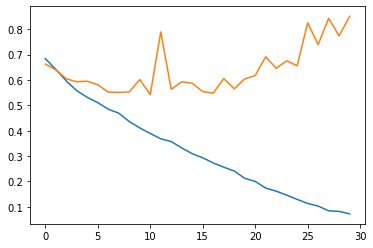

In [13]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')

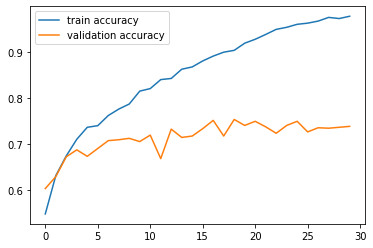

In [14]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()

In [15]:
from keras.preprocessing import image

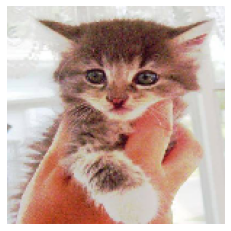

In [20]:
fnames = [ os.path.join(train_cat_path, fname) for fname in os.listdir(train_cat_path) ]

img_path = fnames[100]
img = image.load_img( img_path, target_size=(150, 150) )
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
dataGen = ImageDataGenerator(
  rotation_range = 40,
  width_shift_range= 0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode = 'nearest'
)

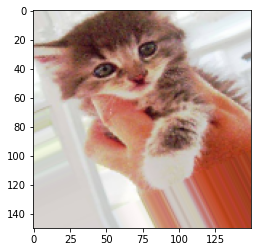

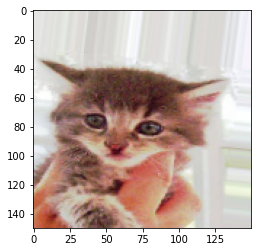

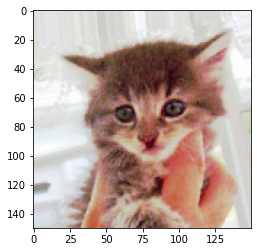

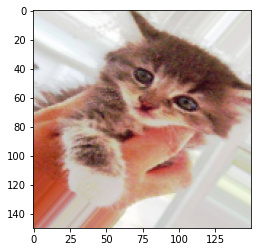

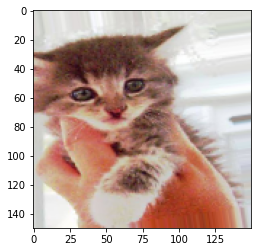

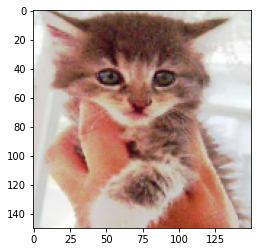

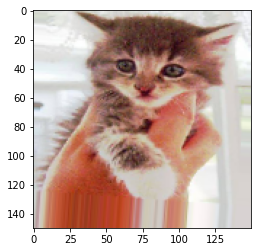

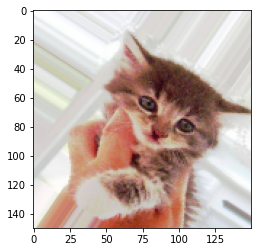

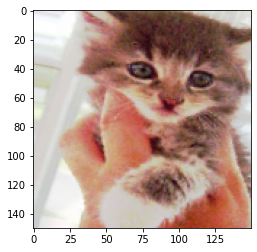

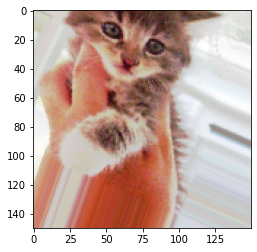

In [22]:
# 150 x 150 x 3 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

# 1 x 150 x 150 x 3 크기로 변환
x = x.reshape((1,) + x.shape)

i = 0
for batch in dataGen.flow(x, batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 10 == 0: break
plt.show()